# Open network models generation

## Exponential network

We now want to build an exponential network with no preferential attachment effects.

In [2]:
import networkx as nx
import scipy as sp
import numpy as np

N = int(5e3)  # number of nodes/steps
M = 4  # links per step


A = sp.sparse.lil_matrix((N, N), dtype=int)

for ind in range(M+1, N):
    rr = np.random.permutation(ind-1)
    A[ind, rr[:M]] = 1
    A[rr[:M], ind] = 1

Net = nx.from_scipy_sparse_array(A)


Let's study some statistics about it.

In [5]:
K = [d for n, d in Net.degree()]

BC = nx.betweenness_centrality(Net)


(array([1.771e+03, 6.830e+02, 4.980e+02, 7.190e+02, 2.910e+02, 2.210e+02,
        2.830e+02, 1.270e+02, 6.700e+01, 8.000e+01, 7.600e+01, 3.700e+01,
        3.000e+01, 4.600e+01, 1.200e+01, 1.000e+01, 2.200e+01, 5.000e+00,
        4.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 4. ,  5.3,  6.6,  7.9,  9.2, 10.5, 11.8, 13.1, 14.4, 15.7, 17. ,
        18.3, 19.6, 20.9, 22.2, 23.5, 24.8, 26.1, 27.4, 28.7, 30. , 31.3,
        32.6, 33.9, 35.2, 36.5, 37.8, 39.1, 40.4, 41.7, 43. ]),
 <BarContainer object of 30 artists>)

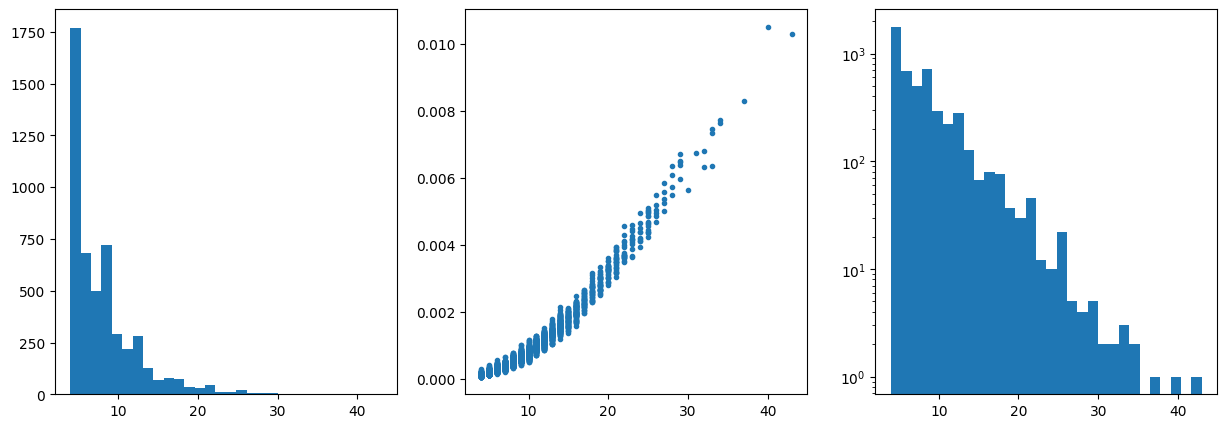

In [16]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(K[1:], bins=30)
ax[1].plot(K[1:], list(BC.values())[1:], '.')
ax[2].set_yscale('log')
ax[2].hist(K[1:], bins=30)


## "B-A" Barabasi-Alberts model

Let's now see what happens with preferential attachment. 

In [32]:
import numpy as np
import scipy as sp

N = int(1e4)
M = 4

# initialize random network
Ni = 25
rr = sp.sparse.triu(np.random.rand(Ni, Ni))
nn = rr > 0.5
nn += nn.T


In [41]:
A = sp.sparse.lil_matrix((N, N), dtype=int)
A[:Ni, :Ni] = nn

for ind in range(Ni+1, N):
    K = np.sum(A, axis=0)
    Kc = np.cumsum(K)
    for i_l in range(M):
        x = np.floor(np.random.rand()*np.sum(K))+1
        ii = np.min(x <= Kc)
        A[ii, ind] = 1
        A[ind, ii] = 1


KeyboardInterrupt: 

In [ ]:
from matplotlib import pyplot as plt
K = np.sum(A, axis=0)


fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

ax.hist(K > 0, bins=30)
